# Keras DNN 최소 코드

In [ ]:
import numpy as np 
import pandas as pd 

## 데이터 준비 
- 1차원 데이터x와 x**2의 1차원 데이터 y 

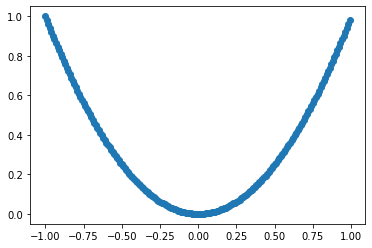

In [ ]:
import numpy as np 
x = np.arange(-1,1,0.01)
y = x**2

import matplotlib.pyplot as plt 

plt.scatter(x,y)
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x.reshape(-1,1),y.reshape(-1,1), train_size= 0.2, random_state=42)

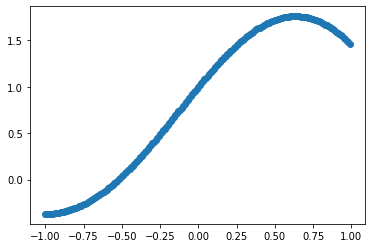

In [ ]:
#2차 곡선 
import numpy as np 
x = np.arange(-1,1,0.01)
y = np.sin(x*2) + np.cos(x)

import matplotlib.pyplot as plt 

plt.scatter(x,y)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y)

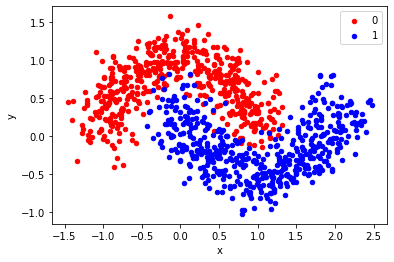

In [ ]:
#moon 형태 , 분류 형태 
from sklearn.datasets import make_moons


# 데이터 생성
x, y = make_moons(n_samples=1000, noise=0.2, random_state=32)


# 데이터 그림 그리기
df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


# 데이터 나누기
split_index = int(len(x)*0.3)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
train_x.shape

(300, 2)

## 모듈 임포트 

In [ ]:
from tensorflow import keras 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
import time 

## dnn 최소 코드 

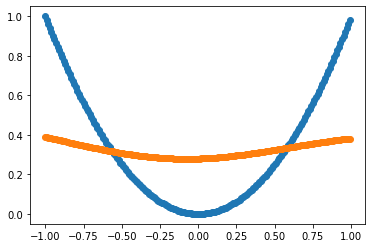

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#kears 모듈 
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input 

import time

#모델 정의 
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1))

#컴파일 : 모델 + optimizer + loss ,일종의 모델 세팅, 학습 방법 설계  
model.compile(optimizer = 'SGD', loss='mse') #loss : 오차 계산 기준 

#학습
model.fit(x,y,epochs=100,verbose=0,batch_size=20) #verbose는 실시간 학습을 보여 줌 

#예측
y_ = model.predict(x)

#결과 그래프로 보기 
plt.scatter(x,y) # 정답
plt.scatter(x,y_) # 예측 결과 
plt.show()

# Keras DNN 최소 코드 + 기본 사용 요소 

## model.evalutate() - 성능 평가
- 출력에 loss, mae 추가 

Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 0.3106 - mae: 0.3804
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2059 - mae: 0.3377
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1597 - mae: 0.3086
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1350 - mae: 0.2931
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1202 - mae: 0.2832
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1108 - mae: 0.2763
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1044 - mae: 0.2707
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1005 - mae: 0.2681
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0976 - mae: 0.2642
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0947 - mae: 0.2626
loss= 0.09471113979816437
mae= 0.2625662088394165


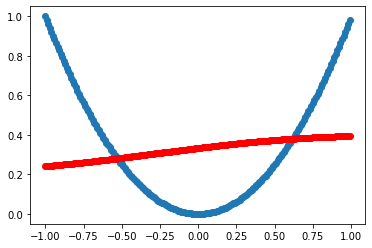

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense ,Input

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1))

#model.compile(optimizer = 'SGD',loss = 'mse')
model.compile(optimizer = 'SGD',loss ='mse',metrics='mae')

model.fit(x,y, epochs = 10, verbose = 1 , batch_size= 20)

loss, mae = model.evaluate(x,y) 
print('loss=', loss)
print('mae=', mae)

y_  = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

## train, test로 나누어서 테스트 셋으로 평가하기

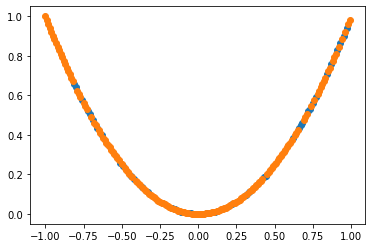

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
23.26485276222229
5/5 [==============================] - 0s 3ms/step - loss: 0.0045 - mae: 0.0417


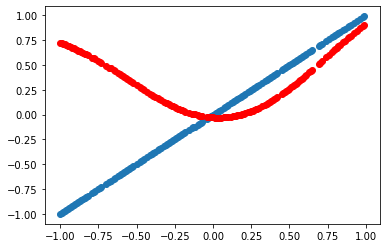

In [ ]:
# 데이터 준비 

x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2 

split_index = int(x.shape[0]*0.8)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x.reshape(-1,1),y.reshape(-1,1), train_size= 0.2, random_state=42)

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

#모델 구축 
from tensorflow import keras 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input
import time 
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(1))

start_time = time.time() 
model.compile(optimizer='SGD', loss = 'mse', metrics = ['mae'])
model.summary() # 모델 네트워크를 보여 줌 

model.fit(train_x, train_y, batch_size = 30, verbose = 0,
          epochs = 2000)

print(time.time()- start_time) # 학습 소요 시간 

#loss, mae = model.evaluate(x,y)
loss, mae = model.evaluate(test_x, test_y) #train 데이터 이외로 test 데이터로 평가 

#predict 
y_ = model.predict(test_x)

plt.scatter(test_x,test_x)
plt.scatter(test_x,y_,color='r')
plt.show()

## verbose 
- 학습되는 과정을 실시간으로 볼 수 있음 
- epochs 별로 step, loss, metrics 등을 볼 수 있음 

- verbose = 0 : 없음
- verbose = 1 : 실시간 게이지로 보임 
- verbose = 2 : 게이지는 없이 각 epochs별로 step, loss, metrics 보임

## model batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.

<br> 

batch_size를 키우면 연산 속도는 빨라지지만 학습 횟수가 감소 해 오차가 커질 수 있다 

## loss 보기
- model.fit 을 history에 넣어 history.history['loss']를 통해 loss history를 볼 수 있음 
- ['val_loss']를 통해 val_loss 도볼 수 있음 

In [ ]:
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20) #<----- model.fit을 hist객체에 넣어서 하면 쉽게 history를 볼 수 잇음 

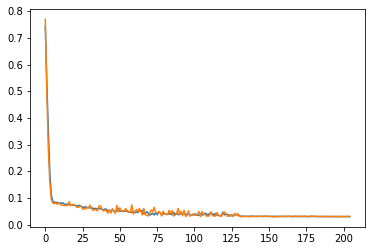

In [ ]:
# model fit할 때 hist 객에 넣어서 train 시키면 더 쉽게 loss history를 볼 수 있음 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## 학습 중 validation 
- 학습하는 과정 중에 성능을 검증하고 평가하기 위한 용도 
- 모델이 over fitting이 일어났는지 확인하기 위한 용도 

In [ ]:
start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1) #<- validation_data를 따로 설정하지 않고 여기서 쉽게 나눌 수 있음 
print("elapsed : {}".format(time.time() - start_time))    

### val loss
- train의 loss 뿐만 아니라 val loss를 따로 볼 수 있음 
- 두개를 비교 해서 overfitting 확인 가능 

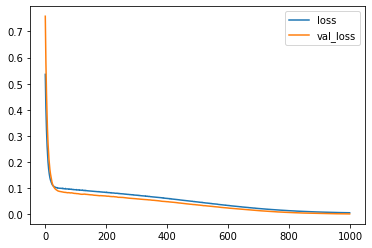

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

##모델 저장과 로드 

In [ ]:
#모델 저장 
model.save('best_model.h5')

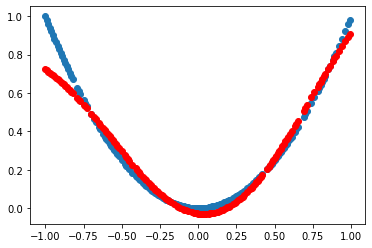

In [ ]:
#모델 로드 
new_model = keras.models.load_model('best_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_, color='r')
plt.show()

## 모델 평가

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 7.083899259567261
5/5 [==============================] - 0s 3ms/step - loss: 0.0384 - mae: 0.1563
loss= 0.0384388267993927
mae= 0.15632088482379913


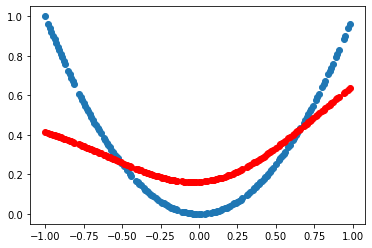

In [ ]:
loss, mae = model.evaluate(test_x, test_y)  # 학습이 끝난 모델을 test데이터를 통해 모델 검증을 할 수 있음 
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x) # 이건 test_x 를 이용해 예측 한 y 와 실제 y를 비교하는 그래프 그리기 용 

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

##웨이트 초기값
- Dense 생성시에 kernel_initializer, bias_initializer로 설정한다 
- he_normal
- lecun_normal 

**vanishing gradient**
- 망이 깊어지고, 넓어질 수록 학습하는 과정에서 output 값과 멀어지는 현상 발생
- 하지만 이것은 활성화 함수를 sigmoid 함수 대신 Relu 함수나 tanh를 사용하면서 어느정도 해결 가능 
- 하지만 처음부터 weight 값들이 최적의 값들이라면 gradient가 작더라도 훌륭한 학습 모델 생성 가능 
- 또는 weight 값들이 최적의 값들이라면 학습 횟수가 많지 않아도 훌륭한 모델 만들 수 있음 

**weight Initializer** 
- gradient vanishing 현상을 완화 하기 위해서 최적의 weight 초기 값을 찾기 위한 방법 
- gradient Vanishing 현상을 완화 하기 위해서 가중치를 초기화 할 때 sigmoid와 같은 s자 함수의 경우 가장 중요한 것은 출력값들이 표준 정규 분포 형태를 갖게 하는 것 
  - output이 표준 정규 분포 형태를 갖게 되어야 안정적으로 학습이 가능 
  - xavier Initailizer 사용 : xavier 초기화 방법은 표준 정규 분포를 입력 개수의 표준 편차로 나누어 주면 된다. 
  - w = np.random.randn(n_input,n_output)/sqrt(n_input) 
  - 하지만 xavier 초기화 방법은 Relu 함수와 사용 불가능, 출력값이 0으로 수렴하고, 평균과 표준편차 모두 0으로 수렴하는 모습 확인 가능 

**Relu 에 사용하는 초기화**
- He Initialization을 사용, 인풋 개수의 절반의 제곱근으로 나누어 주면 됨 
- w = np.random.randn(n_input,n_output) / sqrt(n_input/2)


**결론**
- Singmoid 나 tanh를 사용하는 경우에는 Xavier 초기화
- ReLu를 사용하는 경우에는 He를 사용 
- 초기화를 하는 이유 
  - 신경망이 깊어지면 가중치들의 작은 변화가 큰 변화로 이어지는 불안정한 현상들이 발생, 이를 해결하기 위해 처음에 가중치를 잘 성하는 방법 사용 

**코드**
- he_normal
- lecun_normal

참고 : https://gomguard.tistory.com/184

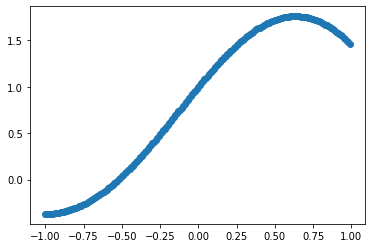

In [ ]:
import numpy as np 
x = np.arange(-1,1,0.01)
y = np.sin(x*2) + np.cos(x)

import matplotlib.pyplot as plt 

plt.scatter(x,y)

from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y)

In [ ]:
from tensorflow.keras.initializers import GlorotNormal

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


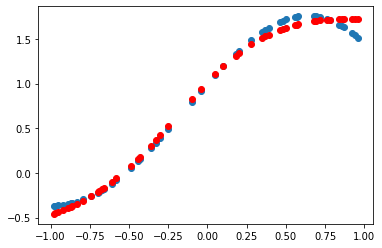

In [ ]:
  model = keras.Sequential()

  model.add(Input(1))
  # model.add(Dense(10,activation = 'tanh', kernel_initializer='he_normal'))
  model.add(Dense(10, activation = 'tanh', kernel_initializer = 'GlorotNormal'))
  model.add(Dense(10, activation = 'tanh', kernel_initializer = 'GlorotNormal'))
  model.add(Dense(1))

  model.compile(optimizer = 'SGD', loss ='mse', metrics =['mae'])
  model.summary()

  model.fit(train_x,train_y, epochs =500, verbose=0, batch_size = 20 )

  y_= model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

## optimizer 

## SGD
model.compile(optimizer="SGD", ...)
model.compile(optimizer=SGD(learning_rate=0.01), ...)

## Adam
model.compile(optimizer="Adam", ...)
model.compile(optimizer=Adam(learning_rate=0.001), ...)

## Adagrad
model.compile(optimizer="Adagrad", ...)
model.compile(optimizer=Adagrad(learning_rate=0.001), ...)

## RMSProp
model.compile(optimizer="RMSprop", ...)
model.compile(optimizer=RMSprop(learning_rate=0.001), ...)

## 다양한 입출력 
- input이 여러개 or output이 여러개 일 수 있음 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                20        
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 2)                 22        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 6.221394300460815
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - mae: 0.0287
loss= 0.0017185844480991364
mae= 0.02869414910674095


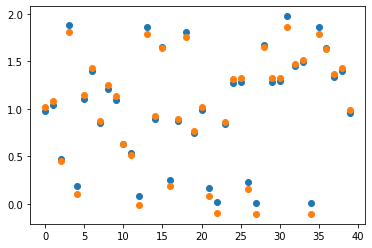

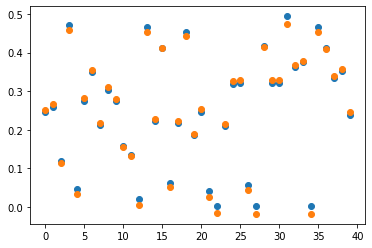

In [ ]:
#output이 여러개인 경우 
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2)) # output 마지막 Dense를 2로 설정 


# DNN 템플릿 

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                20        
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 30.63368582725525
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - mae: 0.0395
loss= 0.0034314573276787996
mae= 0.039514198899269104


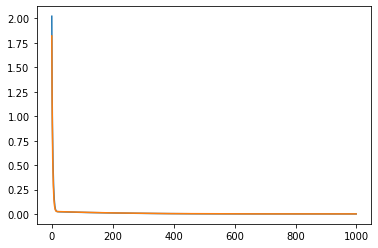

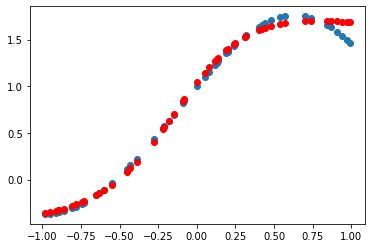

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의 : 모델 설계 
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh', kernel_initializer= 'GlorotNormal'))
model.add(Dense(10, activation='tanh', kernel_initializer= 'GlorotNormal'))
model.add(Dense(1))


# 모델 컴파일 : 모델 요소 구성 
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # 모델의 네트워크를 보여 줌 


# 학습 : 학습 데이터 및 학습 방법, 속도 선택 
start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20,validation_split = 0.1)
print("elapsed : {}".format(time.time() - start_time)) # 학습 소요 시간을 보여 줌 


# 평가 
loss, mae = model.evaluate(test_x, test_y) # 테스트 데이터로 평가 
print("loss=", loss)
print("mae=", mae)

#loss 히스토리 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show() 

# 예측 
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

# Call back 
- 학습 도중 로그 출력이나 모델 저장 등 다양한 액션을 취할 수 있다

## 로스 실시간 출력 
- 실시간 모듈을 직접 class 정의해준 뒤에 model에 정의해준 뒤에 사용 하면 됨 

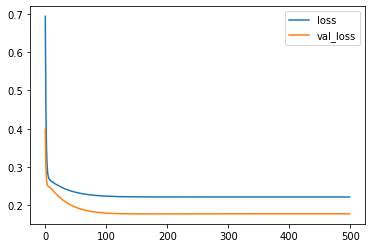

loss =  0.22194166481494904 , val_loss =  0.17806603014469147


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

plot_losses = PlotLosses() #<- 위에서 정의한 class를 여기서 객체 선언 해서 사용 
# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses]) #<- model.fit 마지막에 callbacks 지정 


## 모델 저장 : ModelChecpoint

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

from tensorflow.keras.callbacks import ModelCheckpoint #<- model 저장 객체, best_model.h5라는 모델 이 저장 됨 
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[model_check_point])

## 조기종료 : EarlyStopping 

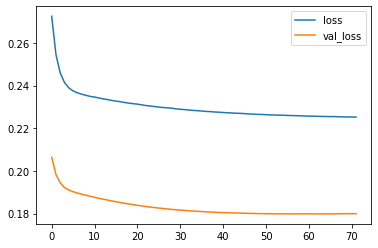

loss =  0.2252352386713028 , val_loss =  0.1799803376197815
Epoch 00072: early stopping


In [ ]:

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상, 이걸 기준으로 멈춤 
    verbose=1,
    patience=50)         # 중지까지의 여유분

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[early_stopping])


## 학습율 조정 : ReduceLROnPlateau 

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])


from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # 모니터링 대상
    patience=25,        # 대상 기간동안 유지
    factor=0.2,         # 줄이는 양                              
    min_learning_rate=0.00001)     # 최소 학습율

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[reduce_lr])

## 학습율 조정 - LearningRateScheduler

In [ ]:

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mse"])

def scheduler(epoch, lr):
  if epoch == 100:
    lr = lr*0.1
    print("learning rate changed at epcoh {} as {}".format(epoch, lr))
  return lr

from tensorflow.keras.callbacks import LearningRateScheduler

lr_scheduler = LearningRateScheduler(scheduler)

# model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[lr_scheduler])



## 종합 - 콜백 부분만 
- 아래 두개 따로 선언해준 다음에 모델 fit 에서 callbacks = callbacks만 해주면 됨 

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
# loss 실시간 출력 
from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

#call backs 선언
plot_losses = PlotLosses()

from tensorflow.keras.callbacks import ModelCheckpoint #<- model 저장 객체, best_model.h5라는 모델 이 저장 됨 
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True)


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상, 이걸 기준으로 멈춤 
    verbose=1,
    patience=50)         # 중지까지의 여유분

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # 모니터링 대상
    patience=25,        # 대상ㅃ 기간동안 유지
    factor=0.2,         # 줄이는 양                              
    min_learning_rate=0.00001)     # 최소 학습율

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]

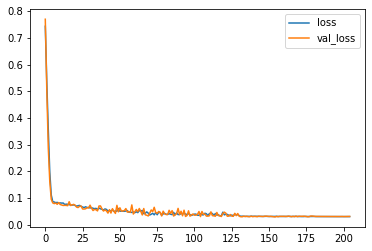

loss =  0.030917994678020477 , val_loss =  0.03153129667043686
7/7 [==============================] - 0s 58ms/step - loss: 0.0309 - mse: 0.0027 - val_loss: 0.0315 - val_mse: 0.0027 - lr: 4.0000e-04
Epoch 00205: early stopping


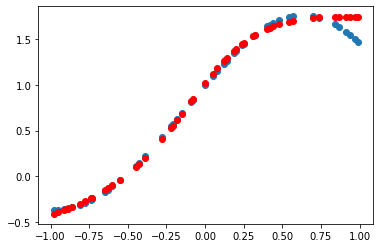

In [ ]:
#model 에서 callbacks 추가 

model = keras.Sequential() 
model.add(Input(1))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dense(1))

model.compile(optimizer = 'SGD', loss = 'mae' , metrics = ['mse']) #여기서는 y값 예측이므로  mse, mae 사용 
model.summary()
history = model.fit(train_x,train_y,validation_split = 0.1, epochs =1000, batch_size =20, callbacks = callbacks) # <- 요 부분만 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color = 'r')
plt.show()

# 오버 피팅 
- 샘플 데이터에 너무 적합하게 학습되었기 때문에 외부의 데이터를 이용할 경우 정확도가 떨어지거나 loss가 높아지는 경우 

## 드롭아웃 
- 학습 시에 임의로 신경망 일부를 사용하지 않고 학습 하여 가중치가 커지는 것을 방지한다 
- 습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지합니다.
- 질문 : 학습 시 제외되는 신경망이 매번 다르게 되어 한쪽에 가중치가 커지는  것을 방지(?) 
- 처음엔 a가 빠졋다가 다음엔 b가 빠졌다가 이런것? 


그니까 모든 신경망을 매번 쓰는 것이 아니라 돌아가면서 쓰는 느낌? 

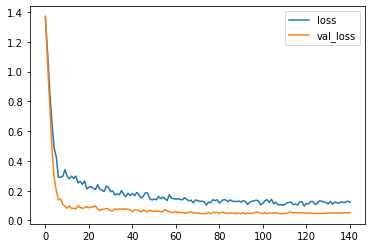

loss =  0.12227745354175568 , val_loss =  0.05157237872481346
7/7 [==============================] - 0s 29ms/step - loss: 0.1223 - mse: 0.0240 - val_loss: 0.0516 - val_mse: 0.0046 - lr: 0.0020
Epoch 00141: early stopping


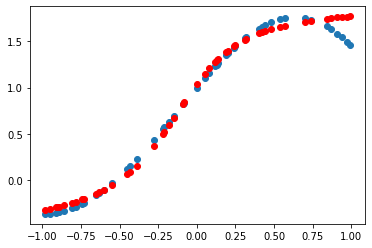

In [ ]:
#model 에서 callbacks 추가 

from tensorflow.keras.layers import Dropout 
model = keras.Sequential() 
model.add(Input(1))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2)) #ADDED
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dropout(0.2)) #ADDED
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dense(1))

model.compile(optimizer = 'SGD', loss = 'mae' , metrics = ['mse']) #여기서는 y값 예측이므로  mse, mae 사용 
model.summary()
history = model.fit(train_x,train_y,validation_split = 0.1, epochs =1000, batch_size =20, callbacks = callbacks) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color = 'r')
plt.show()

In [ ]:
loss , mse = model.evaluate(test_x,test_y)
print(loss)
print(mse)

2/2 [==============================] - 0s 8ms/step - loss: 0.0611 - mse: 0.0074
0.061061792075634
0.007361161056905985


## Batch Normalization 
- 각 중간층에서 정규화를 적용하는 방법 
- 기본적으로 정규화를 하는 이유는 학습을 더 빨리 하기 위해서 or Local optimum 문제에 빠지는 가능성을 줄이기 위해서 사용한다.
- 학습 속도가 빨라짐 

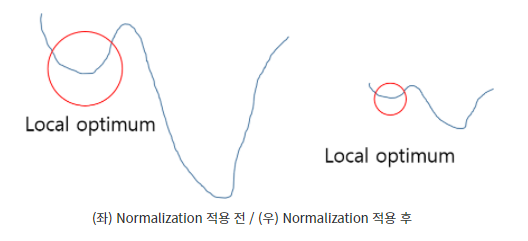

- 배치 정규화는 단순하게 평균과 분산을 구하는 것이 아니라 감마(Scale), 베타(Shift) 를 통한 변환을 통해 비선형 성질을 유지 하면서 학습 될 수 있게 해줌 
배치 정규화가 신경망 레이어의 중간 중간에 위치하게 되어 학습을 통해 감마, 베타를 구할 수 있음 
- Internal Covariate Shift 문제로 인해 신경망이 깊어질 경우 학습이 어려웠던 문제점을 해결
- gradient 의 스케일이나 초기 값에 대한 dependency 가 줄어들어 Large Learning Rate 를 설정할 수 있기 떄문에 결과적으로 빠른 학습 가능함, 즉, 기존 방법에서 learning rate 를 높게 잡을 경우 gradient 가 vanish/explode 하거나 local minima 에 빠지는 경향이 있었는데 이는 scale 때문이었으며, 배치 정규화를 사용할 경우 propagation 시 파라미터의 scale 에 영향을 받지 않게 되기 때문에 learning rate 를 높게 설정할 수 있는 것임
- **regularization 효과가 있기 때문에 dropout 등의 기법을 사용하지 않아도 됨 (효과가 같기 때문)**
- 학습 시 Deterministic 하지 않은 결과 생성 
- Learning Rate Decay 를 더 느리게 설정 가능
- 입력의 범위가 고정되기 때문에 saturating 한 함수를 활성화 함수로 써도 saturation 문제가 일어나지 않음, 여기서 saturation 문제란 가중치의 업데이트가 없어지는 현상임


출처: https://eehoeskrap.tistory.com/430 [Enough is not enough]

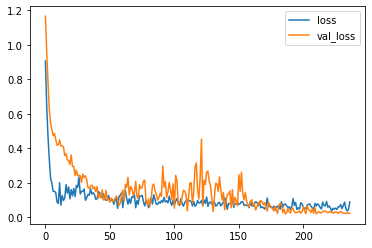

loss =  0.08923202753067017 , val_loss =  0.023382890969514847
7/7 [==============================] - 0s 30ms/step - loss: 0.0892 - mse: 0.0162 - val_loss: 0.0234 - val_mse: 6.6240e-04 - lr: 4.0000e-04
Epoch 00237: early stopping


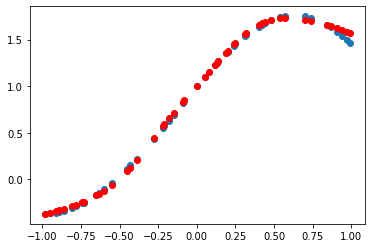

In [ ]:
#model 에서 callbacks 추가 

from tensorflow.keras.layers import BatchNormalization
model = keras.Sequential() 
model.add(Input(1))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal'))
model.add(Dense(1))

model.compile(optimizer = 'SGD', loss = 'mae' , metrics = ['mse']) #여기서는 y값 예측이므로  mse, mae 사용 
model.summary()
history = model.fit(train_x,train_y,validation_split = 0.1, epochs =1000, batch_size =20, callbacks = callbacks) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color = 'r')
plt.show()

## Regularization 
- 가중치에 제한을 둠으로써 모델을 덜 복잡하게 만들어 오버피팅을 방지하는 방법
- 따라서 너무 높은 complexity를 피하기 위해서 쓰는 방법이 Regularization 입니다.
- 가중치에 제약을 두는 것 
- W가 너무 큰 값을 가지게 되면 과하게 구불구불한 형태의 함수가 만들어지는데, Regularization은 이런 모델의 복잡도를 낮추기 위한 방법이다.

**L1 Regularization**

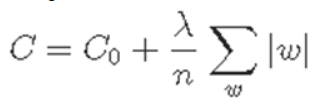

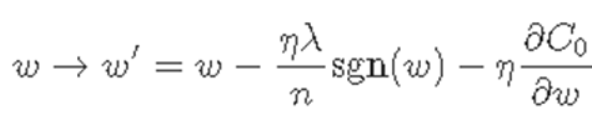
 
 C0 : 원래 cost function

n : 훈련 data 개수

λ : regularization 변수

W : 가중치

- 즉, 위 식을 보면 Weight 값 자체를 줄이는 것이 아니라 W의 부호에 따라 상수 값을 빼주는 방식으로 regularization을 수행한다.


**L2 Regularization** 
- L1과 다른 점은 W값이 절대값이 아닌 제곱 값이라는 점이다.

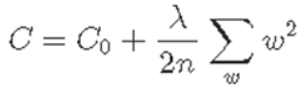


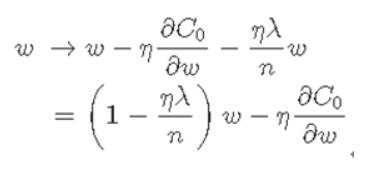

- 여기서 보면 w앞에 곱해진 값에 의해 값이 작아지는 방향으로 진행하게 된다. 이를 weight decay라고 한다. weight decay에 의해 특정 가중치가 비이상적으로 커지고 그것이 학습의 효과에 큰 영향을 끼치는 것을 방지할 수 있다.

**정리**
- regularization을 하는 것, 즉 W가 작아지도록 학습을 한다는 것의 의미는 local noise가 학습에 큰 영향을 끼치지 않는다는 것을 의미하며, outlier(특이점)의 영향을 적게 받도록 하고 싶은 것이다. 결과적으로 일반화에 적합한 특성을 갖게 만드는 것이라 볼 수 있다.

**L1, L2 Regularization 차이**

- L1 : L1은 통상적으로 상수 값을 빼주도록 되어 있기 때문에 특정 weight들은 0으로 수렴하게 되서 몇 개의 중요한 가중치들만 남게 된다. 그러므로 몇 개의 의미 있는 값을 끄집어내고 싶은 경우에는 L1이 효과적이기 때문에 **sparse model에 적합하다.** 단 미분이 불가능한 점이 있기 때문에 gradient-based learning에 적용시에는 주의가 필요하다.
- L2 : L2는 outlier에 대해선 L1보다 덜 Robust(둔감)하다. **따라서 Outlier에 대해 신경을 써야하는 경우에 사용한다.**


출처: https://simsim231.tistory.com/93 [심심한 개발 블로그]



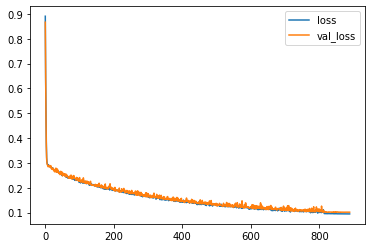

loss =  0.09435820579528809 , val_loss =  0.10127823799848557
7/7 [==============================] - 0s 67ms/step - loss: 0.0944 - mse: 0.0040 - val_loss: 0.1013 - val_mse: 0.0042 - lr: 4.0000e-04
Epoch 00889: early stopping


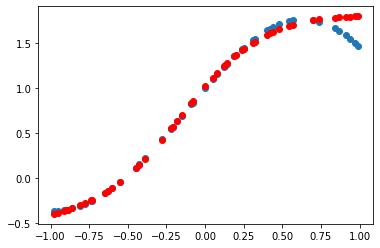

In [ ]:
#model 에서 callbacks 추가 

from tensorflow.keras.regularizers import l1, l2, L1L2 
model = keras.Sequential() 
model.add(Input(1))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal',kernel_regularizer = l2()))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal',kernel_regularizer = l2()))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal',kernel_regularizer = l2()))
model.add(Dense(1))

model.compile(optimizer = 'SGD', loss = 'mae' , metrics = ['mse']) #여기서는 y값 예측이므로  mse, mae 사용 
model.summary()
history = model.fit(train_x,train_y,validation_split = 0.1, epochs =1000, batch_size =20, callbacks = callbacks) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color = 'r')

plt.show()

## 모두 통합

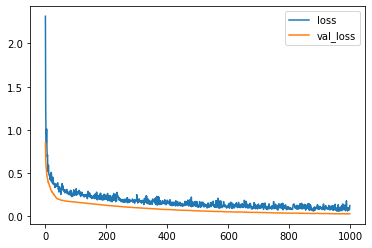

loss =  0.12398739904165268 , val_loss =  0.029703546315431595
2/2 [==============================] - 0s 6ms/step - loss: 0.0339 - mae: 0.0858
loss = 0.033864621073007584
mae = 0.08584139496088028


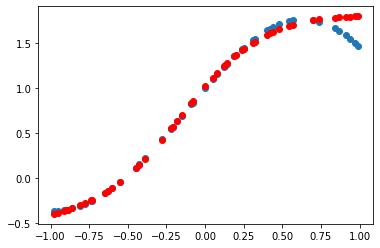

In [ ]:
#예측 문제 
from tensorflow.keras.layers import  Dropout , BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2 

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal',kernel_regularizer= l2()))
model.add(Dropout(0.2)) #ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal',kernel_regularizer= l2()))
model.add(Dropout(0.2)) #ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation = 'tanh', kernel_initializer='GlorotNormal',kernel_regularizer= l2()))
model.add(Dropout(0.2)) #ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(1))

model.compile(optimizer= 'SGD', loss = 'mse', metrics = ['mae'])

history = model.fit(train_x,train_y, batch_size = 20, verbose=1 , validation_split = 0.2, epochs=1000, callbacks = callbacks )

loss, mae = model.evaluate(test_x,test_y)
print(f'loss = {loss}')
print(f'mae = {mae}')

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()



In [ ]:
train_y.shape

(300,)

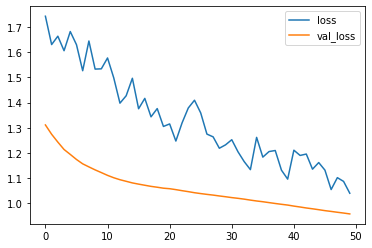

loss =  1.0402854681015015 , val_loss =  0.958289384841919
22/22 [==============================] - 0s 3ms/step - loss: 0.9368 - accuracy: 0.8643
loss = 0.9368295073509216
auc = 0.8642857074737549


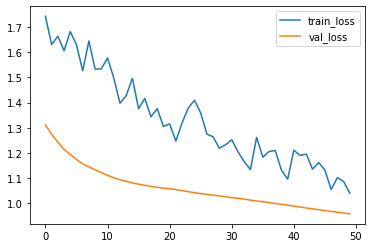

In [ ]:
#분류 문제 
from tensorflow.keras.layers import  Dropout , BatchNormalization
from tensorflow.keras.regularizers import l1, l2, L1L2 

model = keras.Sequential()
model.add(Input(2))
model.add(Dense(10, activation = 'relu', kernel_initializer='he_normal',kernel_regularizer= l2()))
model.add(Dropout(0.2)) #ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation = 'relu', kernel_initializer='he_normal',kernel_regularizer= l2()))
model.add(Dropout(0.2)) #ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(10, activation = 'relu', kernel_initializer='he_normal',kernel_regularizer= l2()))
model.add(Dropout(0.2)) #ADDED
model.add(BatchNormalization()) # ADDED
model.add(Dense(2, activation = 'sigmoid'))

model.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x,train_y, batch_size = 128, verbose=1 , validation_split = 0.2, epochs=50, callbacks = callbacks )

loss, auc = model.evaluate(test_x,test_y)
print(f'loss = {loss}')
print(f'auc = {auc}')

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()



In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax(y_,axis=1)
print(predicted)

[0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0
 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1
 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0
 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 

# data_generator
- 많은 용량의 데이터를 학습할 때 한번에 메모리에 올릴 수 없으므로 조금씩 메모리에 올려 학습시키는 방법 

## 데이터 준비 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Flatten

import time

(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
i = int(len(raw_train_x)*0.8)
raw_train_x, raw_valid_x = raw_train_x[:i], raw_train_x[i:]
raw_train_y, raw_valid_y = raw_train_y[:i], raw_train_y[i:]

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_valid_x.shape)
print(raw_valid_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(48000, 28, 28)
(48000,)
(12000, 28, 28)
(12000,)
(10000, 28, 28)
(10000,)


In [ ]:
BATCH_SIZE = 32 #

import numpy as np
import math
from tensorflow.keras.utils import Sequence
from abc import *
import traceback

class DataGenerator(Sequence):

  def __init__(self, org_image, org_label, batch_size=BATCH_SIZE, shuffle=True):
    self.org_image = org_image/255.
    self.org_label = org_label
    self.batch_size = batch_size
    self.shuffle=shuffle
    self.on_epoch_end()

  def __len__(self):
    return math.ceil(len(self.org_image) / self.batch_size)

  def __getitem__(self, idx):
    indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
    batch_x = [self.org_image[i] for i in indices]
    batch_y = [self.org_label[i] for i in indices]
    return np.array(batch_x), np.array(batch_y)

  def on_epoch_end(self):
    self.indices = np.arange(len(self.org_image))
    if self.shuffle == True:
      np.random.shuffle(self.indices)

In [ ]:
train_data_generator = DataGenerator(raw_train_x, raw_train_y)
valid_data_generator = DataGenerator(raw_valid_x, raw_valid_y)
test_data_generator = DataGenerator(raw_test_x, raw_test_y)

9


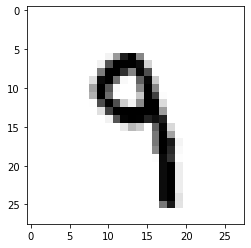

In [ ]:
batch_x, batch_y = train_data_generator.__getitem__(0)

plt.imshow(batch_x[0], cmap=plt.cm.binary)
print(batch_y[0])

## 모델에 적용

In [ ]:
model = keras.Sequential()
# model.add(Input(28*28))
model.add(Input((28,28)))  # ADD
model.add(Flatten())       # ADD
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_data_generator, validation_data=valid_data_generator, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_data_generator)
print("loss=",loss)
print("acc=",acc)

batch_x, batch_y = test_data_generator.__getitem__(0)
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_105 (Dense)           (None, 10)                7850      
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6494 - accuracy: 0.8076 - val_loss: 0.3283 - val_accuracy: 0.9064
Epoch 2/5
1500/1500 [===================

# 모델의 weight만 저장하기

In [ ]:
model.save_weights('my_model_weight') <- 모델을 저장할 때 모델의 weight만 저장 

In [ ]:
model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])
model.summary()

model.load_weights('my_model_weight') 

## 위에서는 기존 모델의 모형 그대로 하고 fit 대신에 model.load_weight를 사용 해줌 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_3 (Flatten)         (None, 68992)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               17662208  
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 25,432,315
Trainable params: 17,663,234
Non-trainable params: 7,769,081
__________________________________

,x,y,label
0,0.310598,-0.513735,1
1,0.900520,-0.659912,1
2,1.410487,-0.360584,1
3,0.478630,0.396622,0
4,1.064065,-0.301897,1
...,...,...,...
995,1.851824,-0.319616,1
996,-0.308902,0.896090,0
997,1.895180,0.062406,1
998,-0.354248,-0.021140,1
